In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
#Python sql toolkit atnd Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine=create_engine("sqlite:///Resources/hawaii.sqlite")

Base=automap_base()
Base.prepare(engine, reflect=True)
print(Base.classes.keys())
#'measurement', 'station' -->save reference to each table
Measurement = Base.classes.measurement
Station=Base.classes.station

['measurement', 'station']


In [29]:
session=Session(engine)

#Design a query to retrieve the last 12 months of precipitation data and plot the results
#calculate the date 1 year ago from the last given point in the data base
session.query(Measurement.date).order_by(Measurement.date.desc()).first() #returns latest date
date=dt.datetime(2016, 8, 24) #date year earlier from result
sel=[Measurement.station,
	  Measurement.date,
	  Measurement.prcp]
precipitation=session.query(*sel).filter(Measurement.date>date).order_by(Measurement.date).all()

In [30]:
#Perform a query to retrieve the data and precipitation scores
#results=session.query(Measurement.prcp).filter(Measurement.date>date).all() #making the query


#Save the query results into a pandas df and set the index to the date column
df=pd.DataFrame(precipitation, columns=['station', 'date', 'prcp'])

#sort the dataframe by date
df.set_index('date', inplace=True)
df.head()

,station,prcp
date,,
2016-08-25,USC00519397,0.08
2016-08-25,USC00513117,0.08
2016-08-25,USC00514830,0.00
2016-08-25,USC00517948,0.00
2016-08-25,USC00519523,0.21


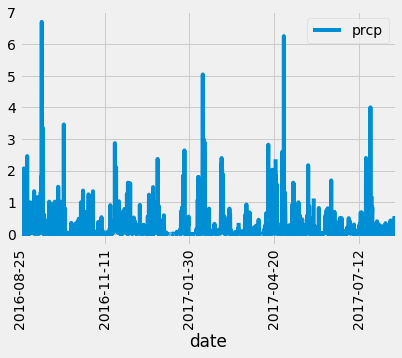

In [31]:
#Use plotting with Pandas to plot the data
df.plot(rot=90)
plt.show()

In [7]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [8]:
# Design a query to show how many stations are available in this dataset?
print(session.query(Station.station).count())

9


In [9]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
groupies=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
groupies_df=pd.DataFrame(groupies, columns=['station', 'count'])
groupies_df.sort_values(by='count', ascending=False)

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [10]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sele = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
pop_station = session.query(*sele).\
    filter(Measurement.station=='USC00519281').\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
pop_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [12]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#results=session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281')

select = [Measurement.tobs,
        Measurement.date]
temp_station = session.query(*select).\
    filter(Measurement.date > '2016-08-18').\
    filter(Measurement.station=='USC00519281').\
    order_by(Measurement.date).all()
temp_station

[(79.0, '2016-08-19'),
 (81.0, '2016-08-20'),
 (79.0, '2016-08-21'),
 (78.0, '2016-08-22'),
 (77.0, '2016-08-23'),
 (77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '20

In [15]:
temp_station_df = pd.DataFrame(temp_station,columns=['temp','date'])
temp_station_df.set_index('date', inplace=True)
temp_station_df.head(12)

,temp
date,
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


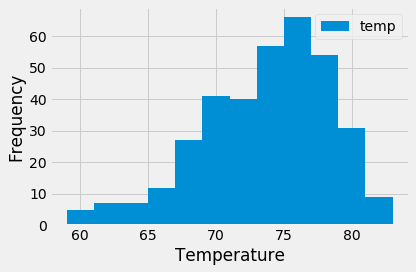

In [16]:
temp_station_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.tight_layout()

In [32]:
# This function called `calc_temps` will accept start date and end date in the format%Y-%m-%d' 
def calc_temps(start_date, end_date):
    if start_date >= end_date:
        print(f'Error: {end_date} is earlier than {start_date}. Please enter a valid date.')
    else:
        temp_min=session.query(func.min(Measurement.tobs)).\
            filter(Measurement.station=='USC00519281').\
            filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).all()
        temp_max=session.query(func.max(Measurement.tobs)).\
            filter(Measurement.station=='USC00519281').\
            filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).all()
        temp_avg=session.query(func.avg(Measurement.tobs)).\
            filter(Measurement.station=='USC00519281').\
            filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).all()
        print(f"""The projected lowest temperature for your trip is {temp_min}.
The projected highest temperature for your trip is {temp_max}.
The projected average temperature for your trip is {temp_avg}.""")

calc_temps('2016-02-14', '2016-02-22')

The projected lowest temperature for your trip is [(60.0,)].
The projected highest temperature for your trip is [(75.0,)].
The projected average temperature for your trip is [(70.33333333333333,)].


In [36]:
# # Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# # for your trip using the previous year's data for those same dates.
start_date = dt.date(2017,6,22) - dt.timedelta(days=365)
end_date = dt.date(2017,7,14) - dt.timedelta(days=365)
calc_temps(start_date, end_date)

The projected lowest temperature for your trip is [(71.0,)].
The projected highest temperature for your trip is [(80.0,)].
The projected average temperature for your trip is [(76.0,)].
